In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

print(df['region'].unique())



[3 2 1 0]


In [54]:
X = df.drop(columns="charges", axis=1)
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression()

In [57]:
linear_training_predictions = LinearModel.predict(X_train)
linear_testing_predictions = LinearModel.predict(X_test)

#Evaluate on training data
from sklearn.metrics import r2_score
print(f"R2 Score: {round(r2_score(y_train, linear_training_predictions), 2)}")

R2 Score: 0.75


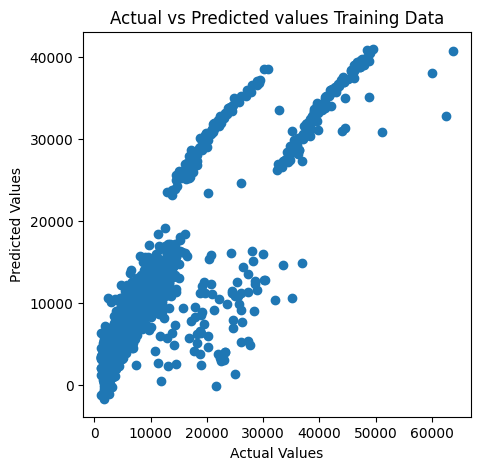

In [61]:
plt.figure(figsize=(5,5))
'''x = actual dependent values, y = predicted dependent values from training independent vals'''
plt.scatter(x = y_train, y = linear_training_predictions) 
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

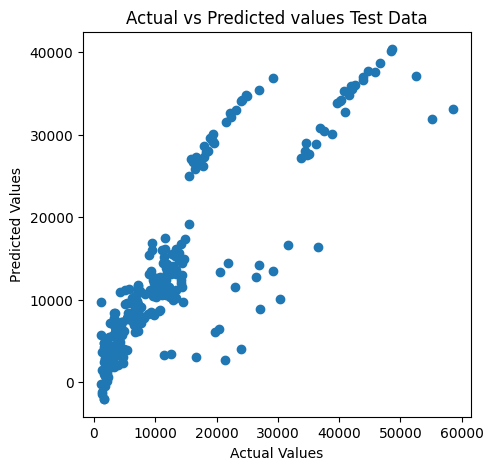

In [63]:
# visualizing the true values and prediction values
plt.figure(figsize=(5,5))
'''x = actual categories, y = predicted categories'''
plt.scatter(x = y_test, y = linear_testing_predictions)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Conclusion
We have performed a simple linear regression on a dataset. We converted the labels to numeric values using a label encoder transform and then applied a built in linear regression model using sklearn